# X Education Customer Lead Score Analysis

This repository about my lead score analysis through customer data with target [ `Converted` ] column.

Data Description :
* Prospect ID : A unique ID with which the customer is identified.
* Lead Number : A lead number assigned to each lead procured.
* Lead Origin : The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
* Lead Source : The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
* Do Not Email : An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
* Do Not Call : An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
* Converted : The target variable. Indicates whether a lead has been successfully converted or not.
* TotalVisits : The total number of visits made by the customer on the website.
* Total Time Spent on Website : The total time spent by the customer on the website.
* Page Views Per Visit : Average number of pages on the website viewed during the visits.
* Last Activity : Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
* Country : The country of the customer.
* Specialization : The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
* How did you hear about X Education : The source from which the customer heard about X Education.
* What is your current occupation : Indicates whether the customer is a student, unemployed or employed.
* What matters most to you in choosing this product : An option selected by the customer indicating what is their main motto behind buying this product.
* Search : Indicating whether the customer had seen the ad in any of the listed items.
* Magazine : Indicating whether the customer had seen the ad in Magazine.
* Newspaper Article : Indicating whether the customer had seen the ad in Newspaper Article.
* X Education Forum : Indicating whether the customer had seen the ad in X Education Forum.
* Newspaper : Indicating whether the customer had seen the ad in Newspaper.
* Digital Advertisement : Indicating whether the customer had seen the ad in Digital Advertisement.
* Through Recommendations : Indicates whether the customer came in through recommendations.
* Receive More Updates About Our Courses : Indicates whether the customer chose to receive more updates about the courses.
* Tags : Tags assigned to customers indicating the current status of the lead.
* Lead Quality : Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
* Update me on Supply Chain Content : Indicates whether the customer wants updates on the Supply Chain Content.
* Get updates on DM Content : Indicates whether the customer wants updates on the DM Content.
*Lead Profile : A lead level assigned to each customer based on their profile.
* City : The city of the customer.
* Asymmetrique Activity Index : An index and score assigned to each customer based on their activity and their profile
* Asymmetrique Activity Index : An index and score assigned to each customer based on their activity and their profile
* Asymmetrique Profile Index : An index and score assigned to each customer based on their activity and their profile
* Asymmetrique Activity Score : An index and score assigned to each customer based on their activity and their profile
* Asymmetrique Profile Score : An index and score assigned to each customer based on their activity and their profile
* I agree to pay the amount through cheque : Indicates whether the customer has agreed to pay the amount through cheque or not.
* A free copy of Mastering The Healthy Live : Indicates whether the customer wants a free copy of 'Mastering the Healthy Live' or not.
* Last Notable Activity : The last notable acitivity performed by the customer.

# Data Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, accuracy_score

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dhykac/lead_scoring/main/lead_scoring.csv')

In [3]:
data.shape

(9240, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Prospect ID                                     9240 non-null   object 
 1   Lead Number                                     9240 non-null   int64  
 2   Lead Origin                                     9240 non-null   object 
 3   Lead Source                                     9204 non-null   object 
 4   Do Not Email                                    9240 non-null   object 
 5   Do Not Call                                     9240 non-null   object 
 6   TotalVisits                                     9103 non-null   float64
 7   Total Time Spent on Website                     9240 non-null   int64  
 8   Page Views Per Visit                            9103 non-null   float64
 9   Last Activity                            

In [5]:
data.describe()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Converted
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000,9240.000000
mean,617188.435606,3.445238,487.698268,2.362820,14.306252,16.344883,0.385390
std,23405.995698,4.854853,548.021466,2.161418,1.386694,1.811395,0.486714
min,579533.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000
25%,596484.500000,1.000000,12.000000,1.000000,14.000000,15.000000,0.000000
50%,615479.000000,3.000000,248.000000,2.000000,14.000000,16.000000,0.000000
75%,637387.250000,5.000000,936.000000,3.000000,15.000000,18.000000,1.000000
max,660737.000000,251.000000,2272.000000,55.000000,18.000000,20.000000,1.000000


In [6]:
data.describe(include="O")

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a product,Search,Magazine,Newspaper Article,X Education Telegram,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Products,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,0c6cd060-7784-4f41-8adf-2596d80cc85b,Landing Page Submission,Google,No,No,Email Opened,Indonesia,Select,Select,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Jakarta,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


In [7]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a product', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Telegram', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Products', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Converted'],
      dtype='object')

In [8]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a product,Search,Magazine,Newspaper Article,X Education Telegram,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Products,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,Indonesia,Select,Select,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,Indonesia,Business Administration,Select,Student,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,Indonesia,Media and Advertising,Word Of Mouth,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Jakarta,02.Medium,01.High,13.0,17.0,No,No,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,Indonesia,Select,Other,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Jakarta,02.Medium,01.High,15.0,18.0,No,No,Modified,1


In [9]:
# Getting unique values for each of the column
for col in data.columns:
    print(f"Column: {col}")
    print(data[col].unique())
    print("="*10)

Column: Prospect ID
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Column: Lead Number
[660737 660728 660727 ... 579545 579538 579533]
Column: Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Column: Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Column: Do Not Email
['No' 'Yes']
Column: Do Not Call
['No' 'Yes']
Column: TotalVisits
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  

# Data Quality Check

## Missing Value Handling

In [10]:
data.isna().mean()*100

Prospect ID                                        0.000000
Lead Number                                        0.000000
Lead Origin                                        0.000000
Lead Source                                        0.389610
Do Not Email                                       0.000000
Do Not Call                                        0.000000
TotalVisits                                        1.482684
Total Time Spent on Website                        0.000000
Page Views Per Visit                               1.482684
Last Activity                                      1.114719
Country                                           26.634199
Specialization                                    15.562771
How did you hear about X Education                23.885281
What is your current occupation                   29.112554
What matters most to you in choosing a product    29.318182
Search                                             0.000000
Magazine                                

In [11]:
# Fill NaN categorical with "Other"
col = ['Lead Source','Last Activity','Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a product','Tags','Lead Quality','Lead Profile','City']
data[col] = data[col].fillna("Other")

# Change NaN index with "00.Other"
col = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index']
data[col] = data[col].fillna("00.Other")

# Fill NaN numerical with 0
col = ['TotalVisits', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
data[col] = data[col].fillna(0)

## Duplicated Value Handling

In [12]:
data.duplicated().sum()

0

Luckily, there aren't duplicated values on our dataset.

## Anomalies Handling

If we pay attention to the columns, we will find that there are columns with "Select" values. This happen because the website setting where the option set to "optinal" and cause the customer could skip the option.

In [13]:
data[(data == 'Select').any(axis=1)].head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a product,Search,Magazine,Newspaper Article,X Education Telegram,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Products,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,Other,Select,Select,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,Indonesia,Select,Select,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Ringing,Other,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,Indonesia,Business Administration,Select,Student,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,Indonesia,Media and Advertising,Word Of Mouth,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Jakarta,02.Medium,01.High,13.0,17.0,No,No,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,Indonesia,Select,Other,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Jakarta,02.Medium,01.High,15.0,18.0,No,No,Modified,1


In [14]:
# Change "missclick" anomalies with other
data = data.replace("Select", "Other")

In [15]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a product,Search,Magazine,Newspaper Article,X Education Telegram,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Products,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,Other,Other,Other,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other,Other,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,Indonesia,Other,Other,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Ringing,Other,No,No,Other,Other,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,Indonesia,Business Administration,Other,Student,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,Indonesia,Media and Advertising,Word Of Mouth,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other,Jakarta,02.Medium,01.High,13.0,17.0,No,No,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,Indonesia,Other,Other,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Other,Jakarta,02.Medium,01.High,15.0,18.0,No,No,Modified,1


# Exploratory Data Analysis

In [16]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a product,Search,Magazine,Newspaper Article,X Education Telegram,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Products,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,Other,Other,Other,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other,Other,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,Indonesia,Other,Other,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Ringing,Other,No,No,Other,Other,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,Indonesia,Business Administration,Other,Student,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,Indonesia,Media and Advertising,Word Of Mouth,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other,Jakarta,02.Medium,01.High,13.0,17.0,No,No,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,Indonesia,Other,Other,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Other,Jakarta,02.Medium,01.High,15.0,18.0,No,No,Modified,1


In [17]:
data.groupby(['Country']).size().sort_values(ascending=False).head()

Country
Indonesia               6492
Other                   2461
United States             69
United Arab Emirates      53
Singapore                 24
dtype: int64

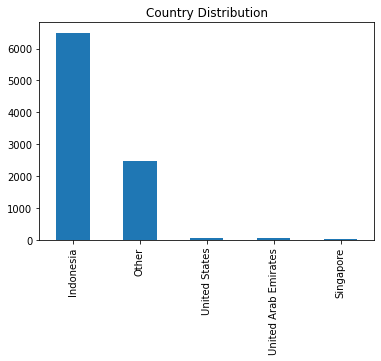

In [18]:
data['Country'].value_counts().head().plot(kind='bar')
plt.title("Country Distribution")
plt.show()

In [19]:
data.groupby(['City']).size().sort_values(ascending=False).head()

City
Other                            3669
Jakarta                          3222
Bodetabek                         752
Other Cities                      686
Cities in Banten & Jawa Barat     457
dtype: int64

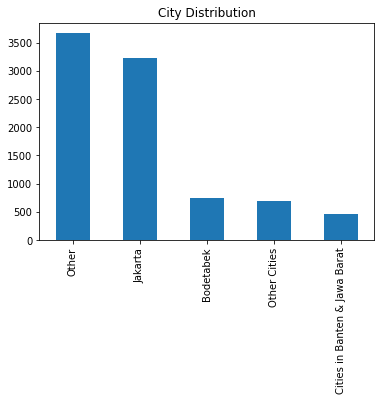

In [20]:
data['City'].value_counts().head().plot(kind='bar')
plt.title("City Distribution")
plt.show()

From the summary above, we know that most of X Education customers are from Indonesia with 6492 customers. Also there are 2461 customers that didn't say where they coming from. Also the most of customers come from Jakarta city (3222 customers), with 3669 didn't say their cities.

In [21]:
data.groupby(['Lead Origin']).size().sort_values(ascending=False).head()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
dtype: int64

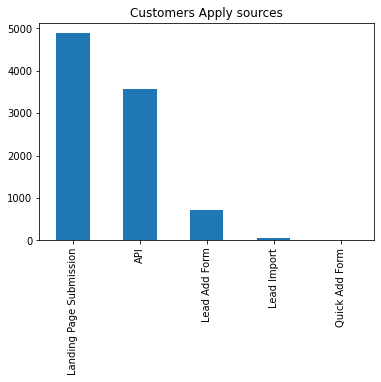

In [22]:
data['Lead Origin'].value_counts().head().plot(kind='bar')
plt.title("Customers Apply sources")
plt.show()

From the summary we know that most of the customers buy X Education via landing page submission with 4886 customers. This can be used as research materials to know how effective the landing page in term of hook a customer. Also we could use this 4886 customers to do A/B Testing on the next research.

In [23]:
data.groupby(['Lead Source']).size().sort_values(ascending=False).head()

Lead Source
Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
dtype: int64

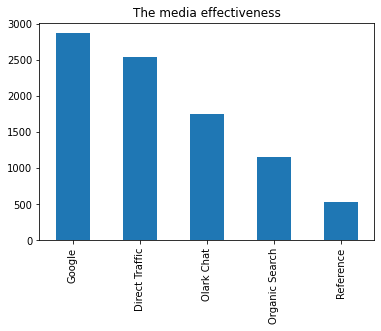

In [24]:
data['Lead Source'].value_counts().head().plot(kind='bar')
plt.title("The media effectiveness")
plt.show()

From the summary we know that most of the customers research about X Education from Google. This can be used as research materials to determine how the marketing performance on every media platforms.

In [25]:
data.groupby(['What is your current occupation']).size().sort_values(ascending=False).head()

What is your current occupation
Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
dtype: int64

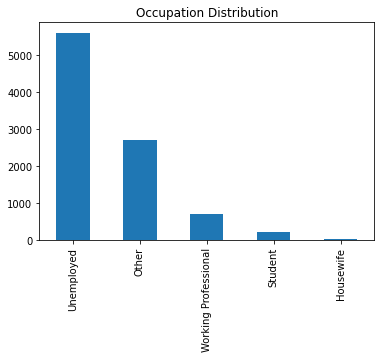

In [26]:
data['What is your current occupation'].value_counts().head().plot(kind='bar')
plt.title("Occupation Distribution")
plt.show()

In [27]:
data.groupby(['Specialization']).size().sort_values(ascending=False).head()

Specialization
Other                        3380
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
dtype: int64

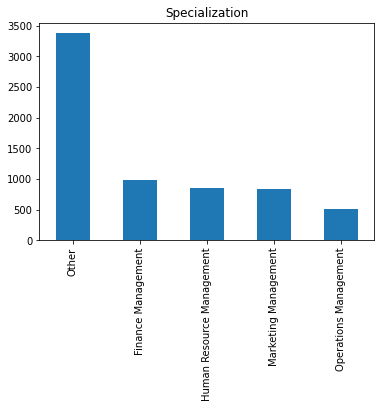

In [28]:
data['Specialization'].value_counts().head().plot(kind='bar')
plt.title("Specialization")
plt.show()

From the summary above, we know that most of the customers of X Education are unemployed with 5600 customers. And, we know that most of the customers coming from finance management background. This could be research material whether to give a discount for certain customers or even give an credit payment allowance to the customers.

# Modeling Preparation

## Encoding

In [29]:
# Drop the Prospect ID and Lead Number since it could be unique for every rows
df_model = data.drop(columns=['Prospect ID' , 'Lead Number'])

# Drop the columns that contains only one values
df_model = df_model.drop(columns=['Magazine', 'Receive More Updates About Our Products', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'])

# Drop the columns that more likely not used
df_model = df_model.drop(columns=['Lead Origin', 'Lead Source', 'Tags', 'Last Activity', 'How did you hear about X Education'])

In [30]:
# Switch rank between index to prevent misleading index
df_model = df_model.replace('03.Low', '01.Low')
df_model = df_model.replace('01.High', '03.High')

# Label encoding
le = preprocessing.LabelEncoder()

df_model['Asymmetrique Activity Index'] = le.fit_transform(df_model['Asymmetrique Activity Index'])
df_model['Asymmetrique Profile Index'] = le.fit_transform(df_model['Asymmetrique Profile Index'])

In [31]:
# Dummy Encoding
df_model = pd.get_dummies(df_model, drop_first=True)
df_model

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Converted,Do Not Email_Yes,Do Not Call_Yes,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Other,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,...,What matters most to you in choosing a product_Healthy for life,What matters most to you in choosing a product_Other,Search_Yes,Newspaper Article_Yes,X Education Telegram_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Other,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Cities in Banten & Jawa Barat,City_Jakarta,City_Other,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.00,2,2,15.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.50,2,2,15.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.00,2,3,14.0,20.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,2,3,13.0,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.00,2,3,15.0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,8.0,1845,2.67,2,3,15.0,17.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,2.0,238,2.00,2,3,14.0,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,2.0,199,2.00,2,3,13.0,20.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,3.0,499,3.00,2,2,15.0,16.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Train-Test Split

In [32]:
# Data percentage train 90 : test 10
X = df_model.drop(['Converted'],axis = 1)
y = df_model['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

## Balanced check

In [33]:
# View the percentage of target feature
target = y_train.value_counts().reset_index()
target.rename(columns={'index':'Converted','Converted':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Converted,freq,percentage
0,0,5098,61.3
1,1,3218,38.7


From the summary, we know that the proportion of the data is 61.3% : 38.7% . By personal preference, this data considered balance. The data imbalanced if one of the feature had proportion more likely up to 75%.

# Modeling

## Random Forest modeling

In [34]:
# Machine Learning using random forest
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)

## Evaluation

In [35]:
# Calculate Accuracy (ONLY VALID FOR BALANCED DATA)
print('Accuracy',accuracy_score(y_test, preds))

Accuracy 0.8506493506493507


The model succeed to predict with rate 85.06% accuracy.

In [36]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, preds)
cm

array([[528,  53],
       [ 85, 258]])

The confusion matrix show :

* The model predicted converted and the customer actually converted is 528.
* The model predicted not converted and the customer actually converted is 85.
* The model predicted converted and the customer actually not converted is 53.
* The model predicted not converted and the customer actually not converted is 258.

In [37]:
# calculate AUC
probs = model.predict_proba(X_test)[:, 1]
print('AUC ',roc_auc_score(y_test, probs))

# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds))

# calculate Precision
print('Precision ',precision_score(y_test, preds))

# calculate Recall
print('Recall ',recall_score(y_test, preds))

AUC  0.9192003331945023
F1 Score  0.7889908256880734
Precision  0.8295819935691319
Recall  0.7521865889212828


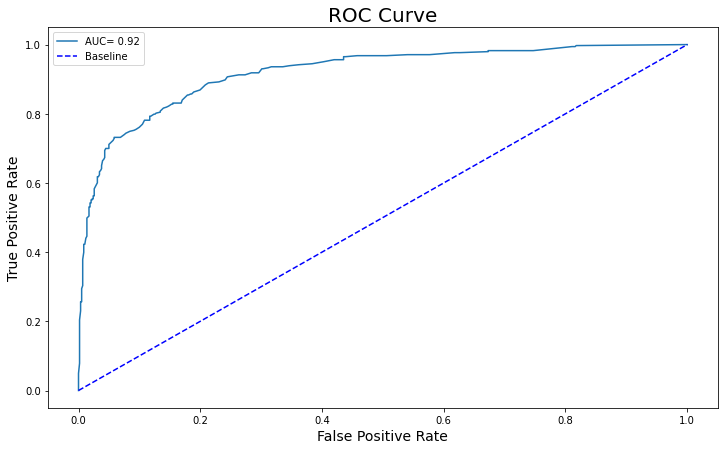

In [38]:
from sklearn.metrics import roc_curve

auc_final = roc_auc_score(y_test, probs)
fpr_final, tpr_final, thresholds_final = roc_curve(y_test, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr_final, tpr_final, label=f'AUC= {auc_final:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

* AUC : The model succeed to distinct between True Positive and True Negative with chance 91.9%
* F1 Score : the harmonic mean between precission and recall is 78.9% which is important for us to consider False Positive and False Negative.
* Precission : The rate of model predict results are False Positive (which is 83%)
* Recall : The rate of model predict results are False Negative (which is 75.2%)

In this kind of data, we must concern on False Positive. This is because we should put our focus on the customer which is predicted to converted but actually not. So the better Precision score, the better company will be prepared.